In [2]:
!pip install japanize_matplotlib

# 確証的データ分析

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')

## 平均に関する検定
1. 仮説を立てる
2. 有意水準を決める
3. Ｐ値を求める
4. 判定

【問題設定 1】  
渋谷を担当するコンビニチェーンのエリアマネージャーは、クーポンシールの導入を検討しています。    
販促効果を確認するため、渋谷エリアにある店舗の中から無作為に10 店舗選び、  
クーポンシールによる販促前と販促後の売上データを取得しました。

In [4]:
# データの読み込み
df = pd.read_csv('sample_01.csv')

In [6]:
df

,No,販促前,販促後
0,初台店,69,73
1,代々木店,81,82
2,幡ヶ谷店,64,68
3,笹塚店,79,81
4,西原店,64,72
5,渋谷店,110,114
6,松濤店,72,73
7,千駄ヶ谷店,92,94
8,広尾店,83,88
9,神宮前店,78,82


In [10]:
# 平均値
df.mean()

販促前    79.2
販促後    82.7
dtype: float64

<AxesSubplot: xlabel='販促後', ylabel='Density'>

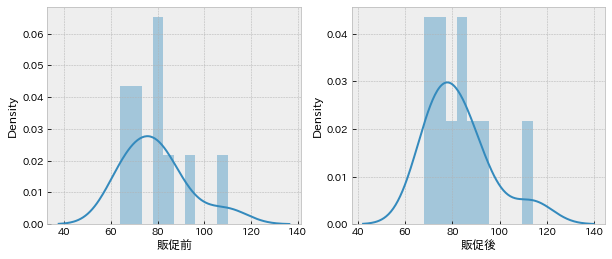

In [14]:
# 分布の確認
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['販促前'], bins=10)
plt.subplot(1, 2, 2)
sns.distplot(df['販促後'], bins=10)

In [20]:
# 正規性の検定（シャピロ・ウィルク検定）
static, pvalue = stats.shapiro(df['販促前'])
pvalue

0.23636476695537567

In [21]:
static, pvalue = stats.shapiro(df['販促後'])
pvalue

0.10092706978321075

 - 仮説を立てる
    - 帰無仮説: 2 群間の平均値に差がない
    - 対立仮説: 2 群間の平均値に差がある
 - 有意水準
    - 5%
 - p値
    - 0.00055 < 0.05
 - 判定
    - 帰無仮説を棄却
    - 2群間の平均値に差がある

In [22]:
stats.ttest_rel(df['販促前'], df['販促後'])

Ttest_relResult(statistic=-5.217491947499509, pvalue=0.0005510378621158206)

【問題設定 2】  
多店舗展開している居酒屋チェーンがあります。  
エリアごとのある月の売上データを、無作為に新宿エリアから 10 店舗、  
渋谷エリアから 10 店舗選び、月の売上高を集計しました。  
売上高の平均は、新宿エリアのほうが、657,000 円、渋谷エリアは、585,125 円です。  
エリアごとの平均売上高に違いがあると言えるでしょうか。

In [24]:
df = pd.read_csv('sample_02.csv')

In [25]:
df

,No,新宿エリア,渋谷エリア
0,1,440,325
1,2,480,934
2,3,525,458
3,4,691,982
4,5,737,340
5,6,725,340
6,7,734,382
7,8,502,820
8,9,763,963
9,10,973,673


In [26]:
df.mean()

No         5.5
新宿エリア    657.0
渋谷エリア    621.7
dtype: float64

<AxesSubplot: xlabel='渋谷エリア', ylabel='Density'>

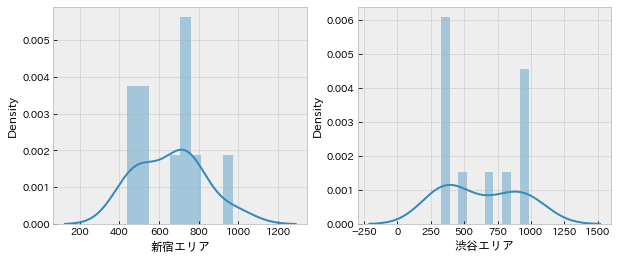

In [27]:
# 分布の確認
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['新宿エリア'], bins=10)
plt.subplot(1, 2, 2)
sns.distplot(df['渋谷エリア'], bins=10)

In [28]:
# 正規性の検定（シャピロ・ウィルク検定）
static, pvalue = stats.shapiro(df['渋谷エリア'])
pvalue

0.03403930366039276

- 仮説立て
    - 帰無仮説：2群間の平均値に差が無い
    - 対立仮説：2群間の平均値に差がある
- 有意水準
    - 5%
- p値
    - 0.570605503511469 > 0.05
- 判定
    - 帰無仮説を棄却できない

In [30]:
# マンホイットニーのＵ検定
stats.mannwhitneyu(df['新宿エリア'], df['渋谷エリア'], alternative='two-sided')

MannwhitneyuResult(statistic=58.0, pvalue=0.570605503511469)